In [1]:
import json
import pandas as pd

from datasets import load_dataset,get_dataset_split_names, get_dataset_config_names #hugging face datasets

# Data preview

In [2]:
import requests
API_URL = "https://datasets-server.huggingface.co/first-rows?dataset=dbpedia_14&config=dbpedia_14&split=train"
def query():
    response = requests.request("GET", API_URL)
    return response.json()
data = query()


In [3]:
data.keys()

dict_keys(['dataset', 'config', 'split', 'features', 'rows'])

In [4]:
pd.DataFrame([line["row"] for line in data["rows"]])

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
95,0,Aegon,Aegon N.V. is a multinational life insurance ...
96,0,Parliamentary Monitoring Services,Parliamentary Monitoring Services is a United...
97,0,Rossiya Bank,The Rossiya Bank (Bank Rossiya in Russian: Ак...
98,0,Third Wire,Third Wire Productions Inc. (also known simpl...


# Data downloading

In [5]:
get_dataset_split_names("dbpedia_14")

['train', 'test']

In [6]:
get_dataset_config_names("dbpedia_14")

['dbpedia_14']

In [7]:
data_train = load_dataset("dbpedia_14", split = "train")
data_test = load_dataset("dbpedia_14", split = "test")

Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)


In [16]:
data_train

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 560000
})

In [22]:
data_test

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 70000
})

In [38]:
# For some reason slicing loads faster the dataset (23s vs 1.9s)
df_train = pd.DataFrame(data_train[:560000])
df_train

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
559995,13,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,13,Science & Spirit,Science & Spirit is a discontinued American b...
559997,13,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...
559998,13,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...


In [21]:
# it has only 70000 rows, but for some reason slicing loads faster the dataset
df_test = pd.DataFrame(data_test[:70000])
df_test.head()

,label,title,content
0,0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,0,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
...,...,...,...
69995,13,Energy Victory,Energy Victory: Winning the War on Terror by ...
69996,13,Bestiario,Bestiario is a book of 8 short stories writte...
69997,13,Wuthering Heights,Wuthering Heights is a novel by Emily Brontë ...
69998,13,L'Indépendant,L'Indépendant is a newspaper published in Lux...


### Labels distribution

The data is completely balanced, as shown in the plots

In [35]:
df_train["label"].value_counts()

0     40000
1     40000
2     40000
3     40000
4     40000
5     40000
6     40000
7     40000
8     40000
9     40000
10    40000
11    40000
12    40000
13    40000
Name: label, dtype: int64

<AxesSubplot:>

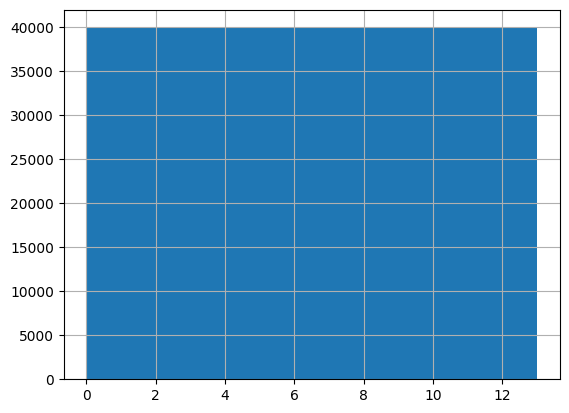

In [34]:
df_train["label"].hist(bins = len(df_train["label"].unique()))

<AxesSubplot:>

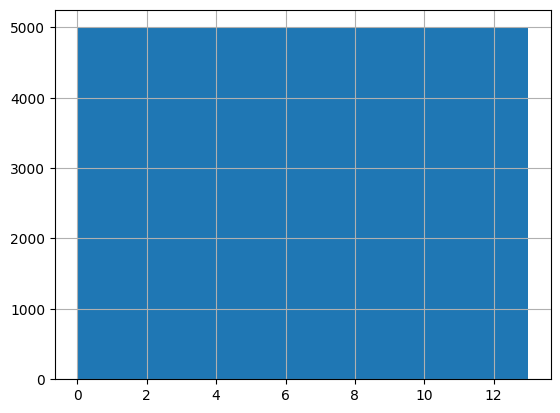

In [36]:
df_test["label"].hist(bins = len(df_test["label"].unique()))

### Cleaning data:

We have some text with non-english characters

In [39]:
def isEnglish(s):
    try:
        s["content"].encode(encoding='utf-8').decode('ascii')
        s["title"].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        pass
    else:
        return s

In [44]:
clean_df_train = df_train.apply(lambda line: isEnglish(line), axis=1)

In [50]:
examples_non_english = df_train[clean_df_train.isna()].dropna(how="any")
examples_non_english.head()

,label,title,content
2,0.0,Q-workshop,Q-workshop is a Polish company located in Poz...
10,0.0,Angstrem (company),Angstrem Group (Russian: ОАО «Ангстрем» named...
12,0.0,JVC,Victor Company of Japan Ltd (日本ビクター株式会社 Nippo...
13,0.0,Toei Bus,The Toei Bus (都営バス Toei Basu) is a bus servic...
18,0.0,CIB Bank,CIB Bank is the second-biggest commercial ban...


In [52]:
clean_df_train = clean_df_train.dropna(how="any")
clean_df_train

,label,title,content
0,0.0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0.0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
3,0.0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0.0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
5,0.0,The Unsigned Guide,The Unsigned Guide is an online contacts dire...
...,...,...,...
559994,13.0,Scoliosis (journal),Scoliosis (ISSN 1748-7161) is an open-access ...
559995,13.0,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,13.0,Science & Spirit,Science & Spirit is a discontinued American b...
559997,13.0,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

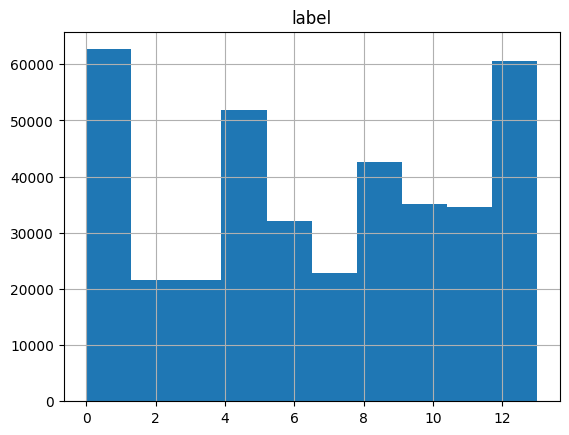

In [53]:
clean_df_train.hist("label")

# Baseline model
